In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [5]:
# To load the dataset
df = pd.read_csv("C:/Users/AmalDev/OneDrive/Desktop/Assignments/ML/house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# 1.Basic EDA

In [7]:
print(df.head())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [11]:
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [13]:
# To Check the missing values
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


# 2. Outlier Detection & Removal

In [15]:
# a) Mean and Standard deviation
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()
df_mean_std = df[(df['price_per_sqft'] >= mean - 2*std) & (df['price_per_sqft'] <= mean + 2*std)]

In [17]:
# b)Percentile method
low = df['price_per_sqft'].quantile(0.05)
high = df['price_per_sqft'].quantile(0.95)
df_percentile = df[(df['price_per_sqft'] >= low) & (df['price_per_sqft'] <= high)]

In [19]:
# c) IQR(Inter quartile range method)
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
df_iqr = df[(df['price_per_sqft'] >= Q1 - 1.5*IQR) & (df['price_per_sqft'] <= Q3 + 1.5*IQR)]

In [21]:
# d) Z Score method
from scipy.stats import zscore
df['zscore'] = zscore(df['price_per_sqft'])
df_zscore = df[df['zscore'].abs() <= 3]

# 3. Box Plot Comparison

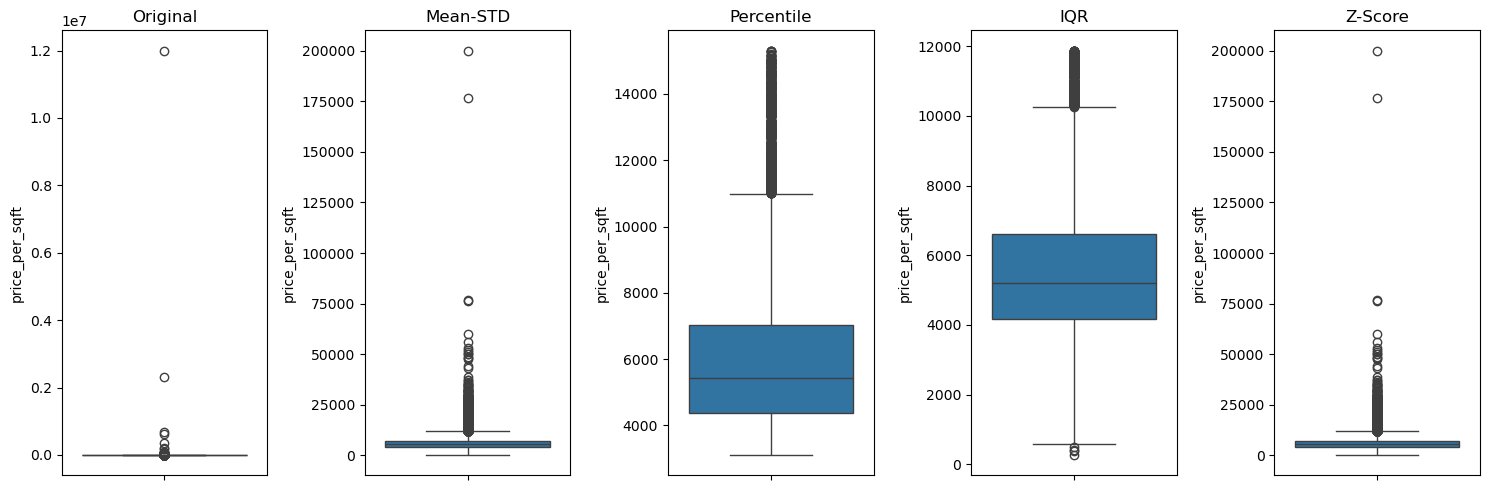

In [23]:
plt.figure(figsize=(15, 5))

# Original
plt.subplot(1, 5, 1)
sns.boxplot(y=df['price_per_sqft'])
plt.title("Original")

# Mean-STD
plt.subplot(1, 5, 2)
sns.boxplot(y=df_mean_std['price_per_sqft'])
plt.title("Mean-STD")

# Percentile
plt.subplot(1, 5, 3)
sns.boxplot(y=df_percentile['price_per_sqft'])
plt.title("Percentile")

# IQR
plt.subplot(1, 5, 4)
sns.boxplot(y=df_iqr['price_per_sqft'])
plt.title("IQR")

# Z-score
plt.subplot(1, 5, 5)
sns.boxplot(y=df_zscore['price_per_sqft'])
plt.title("Z-Score")

plt.tight_layout()
plt.show()

# 4. Histogram & Normality Check

Before Transformation:
Skewness: 108.26875024325159
Kurtosis: 12090.633538860382


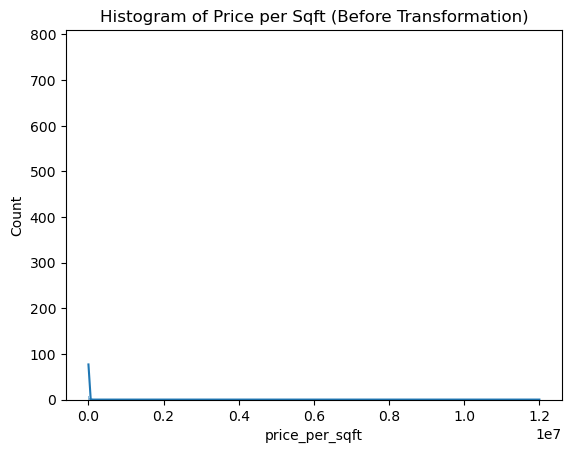

After Transformation:
Skewness: 1.4003259019533636
Kurtosis: 9.203000543610957


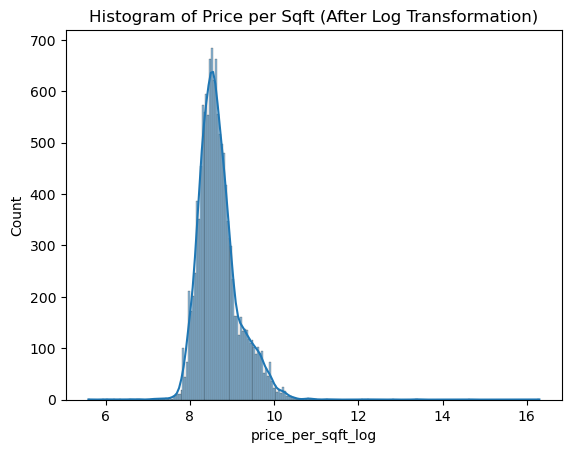

In [27]:
from scipy.stats import skew, kurtosis

# Skewness and Kurtosis before
print("Before Transformation:")
print("Skewness:", skew(df['price_per_sqft']))
print("Kurtosis:", kurtosis(df['price_per_sqft']))

# Histogram
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Histogram of Price per Sqft (Before Transformation)")
plt.show()

# Log Transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

# After Transformation
print("After Transformation:")
print("Skewness:", skew(df['price_per_sqft_log']))
print("Kurtosis:", kurtosis(df['price_per_sqft_log']))

sns.histplot(df['price_per_sqft_log'], kde=True)
plt.title("Histogram of Price per Sqft (After Log Transformation)")
plt.show()

# 5. Correlation Heatmap

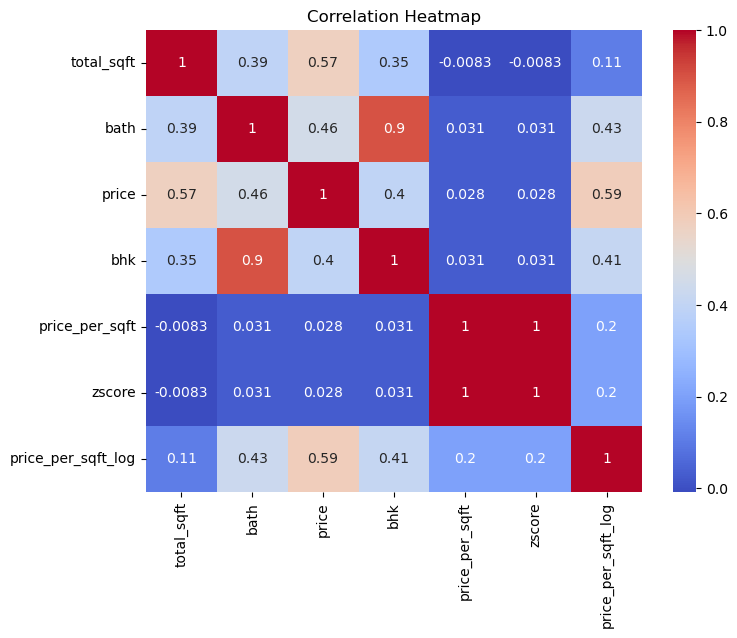

In [29]:
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 6. Scatter Plots

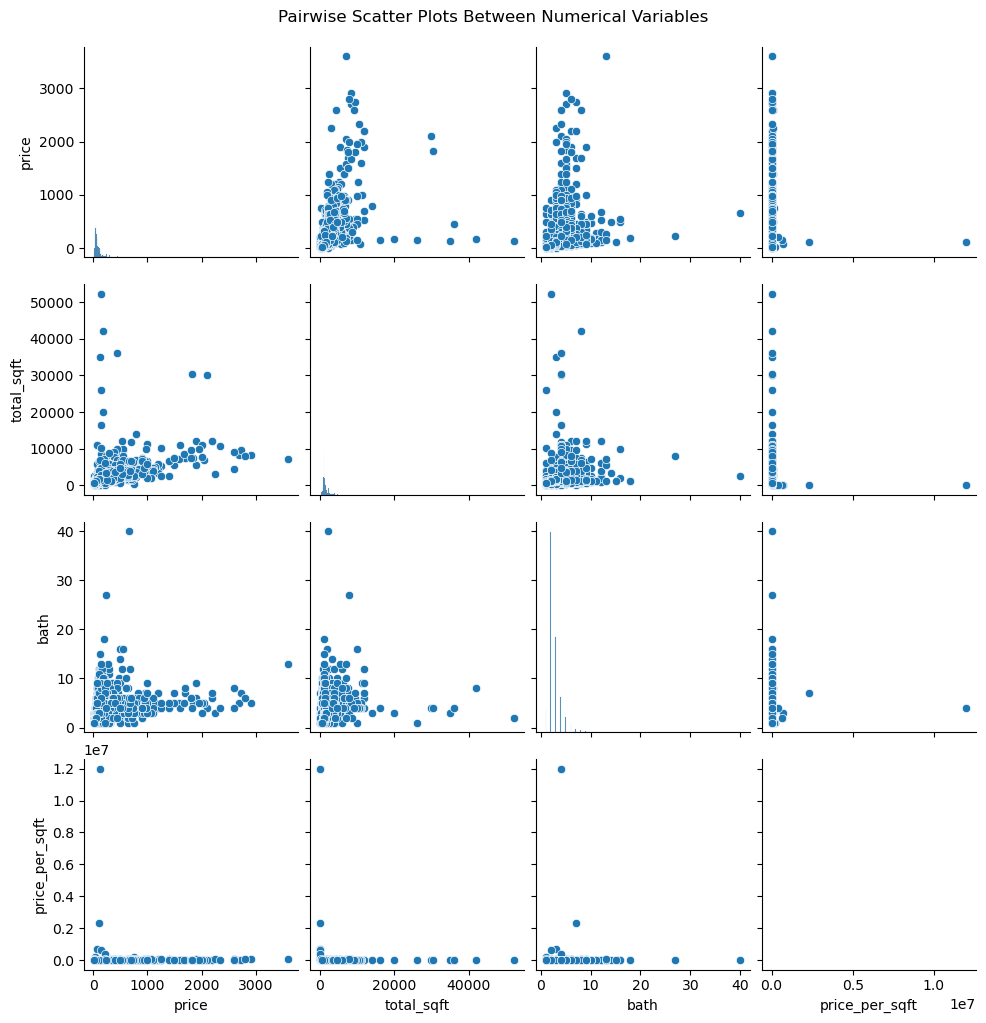

In [31]:
numerical_cols = ['price', 'total_sqft', 'bath', 'price_per_sqft']

sns.pairplot(df[numerical_cols])
plt.suptitle("Pairwise Scatter Plots Between Numerical Variables", y=1.02)
plt.show()